In [1]:
!pip install opencv-python
!pip install opencv-python-headless

     |████████████████████████████████| 60.9 MB 264 kB/s eta 0:00:011
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 48.3 MB 7.8 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
pip install -U scikit-image

     |████████████████████████████████| 12.4 MB 15.1 MB/s eta 0:00:01
     |████████████████████████████████| 148 kB 42.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 25.4 MB/s eta 0:00:01     |██████████████████████▌         | 1.1 MB 25.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 37.4 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import scipy
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras import layers, Sequential
from matplotlib import pyplot
from math import floor
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from numpy import expand_dims, array, exp, max
import json
import skimage.feature as feature
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

In [10]:
model1 = VGG16()
model2 = Model(inputs=model1.inputs, outputs=model1.layers[1].output)
model = Sequential(layers=model2.layers)
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [11]:
###########################THIS CODE CHECKS IMAGES FROM A FOLDER#################################

def sortTrainImages():
    # load the json file
    p = {}
    with open('../Oxford_Flowers102/Export_oxford_flowers.json') as dfp:
        s_data = json.load(dfp)     
        for i,o in s_data.items():
            dic_toy = {'image': o['image'], 'category_index': o['category_index'], 'category': o['category']}
            p.update({o['category'] + "_" + str(i): dic_toy})
       

    return p


images_collection = sortTrainImages()

In [17]:
print(len(images_collection))

1632


In [12]:
def softMax(temperature, features_list):
    feat_list = [x / temperature for x in features_list]
    feature_list = exp(feat_list - max(feat_list))
    return feature_list / feature_list.sum(axis=0)

class: passion flower
img:
class: passion flower
img:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


class: passion flower
img:
class: passion flower
img:
class: passion flower
img:
class: passion flower
img:
class: passion flower
img:
class: passion flower
img:
class: passion flower
img:
class: passion flower
img:
class: passion flower
img:
class: passion flower
img:
class: passion flower
img:
class: passion flower
img:
class: passion flower
img:
class: passion flower
img:
class: water lily
img:
class: water lily
img:
class: water lily
img:
class: water lily
img:
class: water lily
img:
class: water lily
img:
class: water lily
img:
class: water lily
img:
class: water lily
img:
class: water lily
img:
class: water lily
img:
class: water lily
img:
class: water lily
img:
class: water lily
img:
class: water lily
img:
class: water lily
img:
class: magnolia
img:
class: magnolia
img:
class: magnolia
img:
class: magnolia
img:
class: magnolia
img:
class: magnolia
img:
class: magnolia
img:
class: magnolia
img:
class: magnolia
img:
class: magnolia
img:
class: magnolia
img:
class: magnolia
img:
cl

class: canna lily
img:
class: canna lily
img:
class: canna lily
img:
class: canna lily
img:
class: canna lily
img:
class: purple coneflower
img:
class: purple coneflower
img:
class: purple coneflower
img:
class: purple coneflower
img:
class: purple coneflower
img:
class: purple coneflower
img:
class: purple coneflower
img:
class: purple coneflower
img:
class: purple coneflower
img:
class: purple coneflower
img:
class: purple coneflower
img:
class: purple coneflower
img:
class: purple coneflower
img:
class: purple coneflower
img:
class: purple coneflower
img:
class: purple coneflower
img:
class: osteospermum
img:
class: osteospermum
img:
class: osteospermum
img:
class: osteospermum
img:
class: osteospermum
img:
class: osteospermum
img:
class: osteospermum
img:
class: osteospermum
img:
class: osteospermum
img:
class: osteospermum
img:
class: osteospermum
img:
class: osteospermum
img:
class: osteospermum
img:
class: osteospermum
img:
class: osteospermum
img:
class: osteospermum
img:
class

class: monkshood
img:
class: monkshood
img:
class: monkshood
img:
class: monkshood
img:
class: monkshood
img:
class: grape hyacinth
img:
class: grape hyacinth
img:
class: grape hyacinth
img:
class: grape hyacinth
img:
class: grape hyacinth
img:
class: grape hyacinth
img:
class: grape hyacinth
img:
class: grape hyacinth
img:
class: grape hyacinth
img:
class: grape hyacinth
img:
class: grape hyacinth
img:
class: grape hyacinth
img:
class: grape hyacinth
img:
class: grape hyacinth
img:
class: grape hyacinth
img:
class: grape hyacinth
img:
class: english marigold
img:
class: english marigold
img:
class: english marigold
img:
class: english marigold
img:
class: english marigold
img:
class: english marigold
img:
class: english marigold
img:
class: english marigold
img:
class: english marigold
img:
class: english marigold
img:
class: english marigold
img:
class: english marigold
img:
class: english marigold
img:
class: english marigold
img:
class: english marigold
img:
class: english marigold

class: moon orchid
img:
class: moon orchid
img:
class: moon orchid
img:
class: moon orchid
img:
class: moon orchid
img:
class: moon orchid
img:
class: moon orchid
img:
class: hippeastrum
img:
class: hippeastrum
img:
class: hippeastrum
img:
class: hippeastrum
img:
class: hippeastrum
img:
class: hippeastrum
img:
class: hippeastrum
img:
class: hippeastrum
img:
class: hippeastrum
img:
class: hippeastrum
img:
class: hippeastrum
img:
class: hippeastrum
img:
class: hippeastrum
img:
class: hippeastrum
img:
class: hippeastrum
img:
class: hippeastrum
img:
class: hard-leaved pocket orchid
img:
class: hard-leaved pocket orchid
img:
class: hard-leaved pocket orchid
img:
class: hard-leaved pocket orchid
img:
class: hard-leaved pocket orchid
img:
class: hard-leaved pocket orchid
img:
class: hard-leaved pocket orchid
img:
class: hard-leaved pocket orchid
img:
class: hard-leaved pocket orchid
img:
class: hard-leaved pocket orchid
img:
class: hard-leaved pocket orchid
img:
class: hard-leaved pocket orch

class: alpine sea holly
img:
class: alpine sea holly
img:
class: alpine sea holly
img:
class: alpine sea holly
img:
class: alpine sea holly
img:
class: alpine sea holly
img:
class: alpine sea holly
img:
class: alpine sea holly
img:
class: alpine sea holly
img:
class: great masterwort
img:
class: great masterwort
img:
class: great masterwort
img:
class: great masterwort
img:
class: great masterwort
img:
class: great masterwort
img:
class: great masterwort
img:
class: great masterwort
img:
class: great masterwort
img:
class: great masterwort
img:
class: great masterwort
img:
class: great masterwort
img:
class: great masterwort
img:
class: great masterwort
img:
class: great masterwort
img:
class: great masterwort
img:
class: siam tulip
img:
class: siam tulip
img:
class: siam tulip
img:
class: siam tulip
img:
class: siam tulip
img:
class: siam tulip
img:
class: siam tulip
img:
class: siam tulip
img:
class: siam tulip
img:
class: siam tulip
img:
class: siam tulip
img:
class: siam tulip
img:

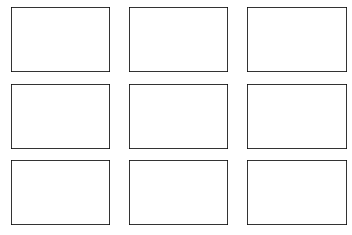

In [16]:
for o, j in images_collection.items():
    image_features_array = []
    o = o.split('_')
    o = o[0]
    print("class:", o)
    
    image_string = '../Oxford_Flowers102/102flowers/jpg/'+ j['image']
    # load the image with the required input shape
    img = imread(image_string)
    img = resize(img,(224,224,3))
    # get the path of image to extract the class
    img_class = o
    img = img_to_array(img)    
    # expand the image dimensions
    img = expand_dims(img, axis=0)
    print("img:")
    # scale the pixels
    img = preprocess_input(img)
    # get the features of the first layer
    feature_maps = model.predict(img)
    
    numerator = []
    
   
    ix = 1
    square = 3
    for _ in range(square):
        for _ in range(square):
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            ##################FLATTEN THE FEATURE for dimensionality reduction##################################
            feature_items = array(feature_maps[0, :, :, ix - 1])
            #convert the floats in the feature into unsigned integers
            features_x = feature_items.astype(np.uint8)
            #get the grey-level cooccurrence matrix
            graycom = feature.greycomatrix(features_x, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)            
            # Find the GLCM properties
            contrast = feature.greycoprops(graycom, 'contrast')
            dissimilarity = feature.greycoprops(graycom, 'dissimilarity')
            homogeneity = feature.greycoprops(graycom, 'homogeneity')
            energy = feature.greycoprops(graycom, 'energy')
            correlation = feature.greycoprops(graycom, 'correlation')            
            ASM = feature.greycoprops(graycom, 'ASM')
            #get the probability distribution for this feature using correlation
            correlation_prob =softMax(0.5,correlation[0])
            #get the conflated distribution for this feature
            conf_numerator = np.prod(correlation_prob)
            numerator.append(conf_numerator)
            #image_features_array.append(correlation_prob)
            image_features_array.append(numerator)
            #pyplot.imshow(feature_maps[0, :, :, ix - 1], cmap='gray')
            
            ix += 1
    denominator = np.trapz(numerator,axis=0)
    #conflated distribution for the image becomes
    conflated_dist = numerator/denominator
    new_rec = {j['image'] + "_/" + o: conflated_dist.tolist()}
        
    with open("../files/oxford_flowers_domain_data_correlation_glcm.json", 'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["target_images"].append(new_rec)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent=4)